In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [102]:
data = pd.read_csv("Titanic dataset.csv")
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [104]:
#label encoding
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data["sex"]=LE.fit_transform(data["sex"])
data["embarked"] = LE.fit_transform(data["embarked"])

In [105]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,2
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,2
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,2


Exploratory analysis

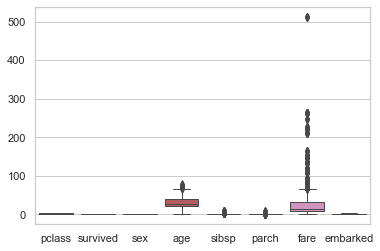

In [106]:
sns.boxplot(data=data,linewidth=1)
plt.show()

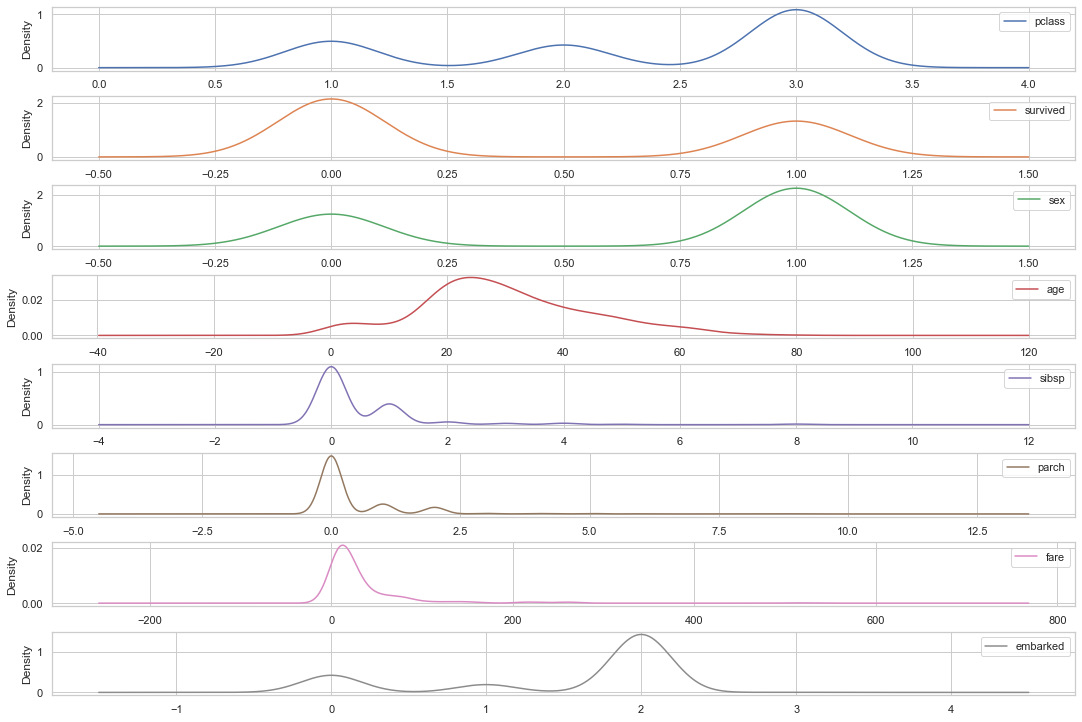

In [107]:
data.plot(kind="density",subplots=True,sharex=False,figsize=(15,10))
plt.tight_layout(pad=0.5)
plt.show()

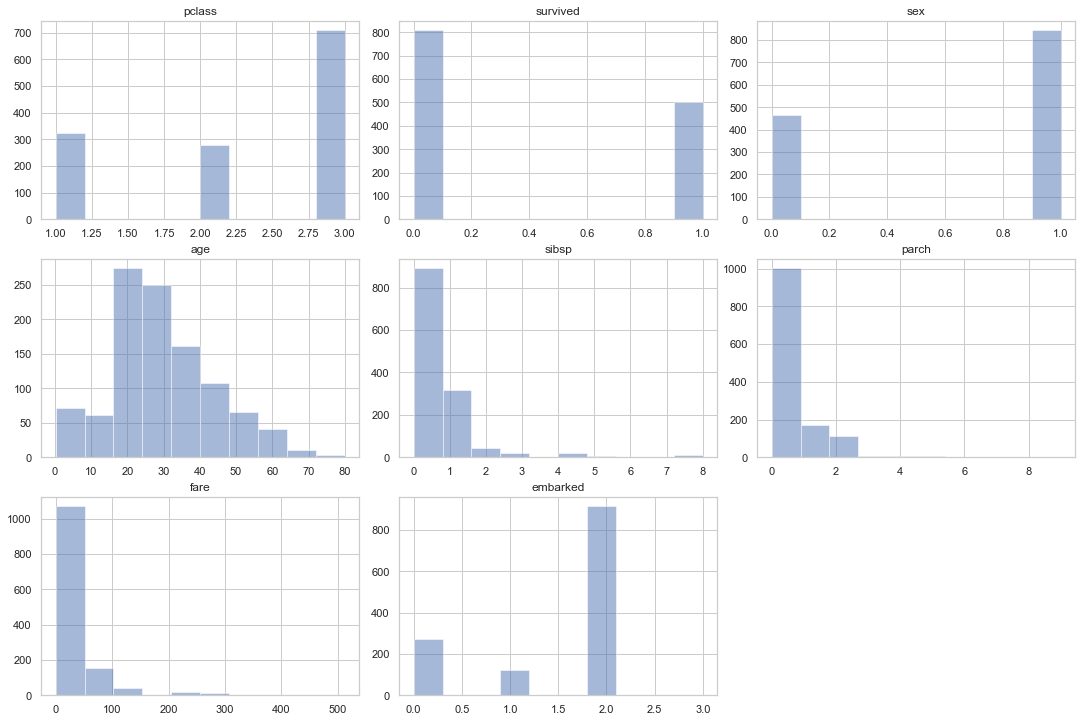

In [108]:
data.hist(alpha = 0.5, figsize=(15,10))
plt.tight_layout(pad= 0.5)
plt.show()

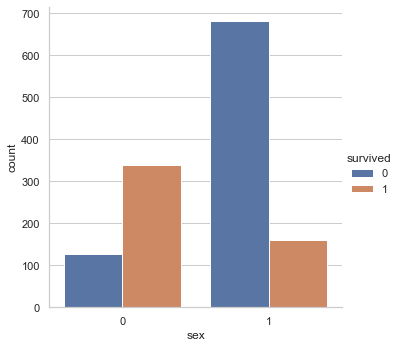

In [109]:
sns.set_theme(style="whitegrid")
sns.catplot(data=data,kind="count", x="sex",hue="survived")
plt.show()

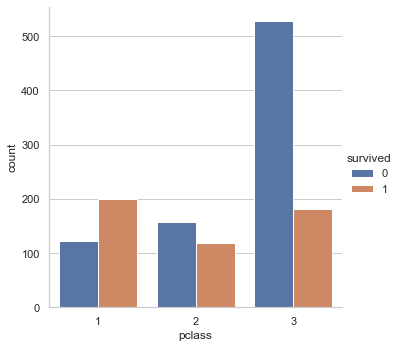

In [110]:
sns.catplot(data=data,kind="count", x="pclass",hue="survived")
plt.show()

<AxesSubplot:>

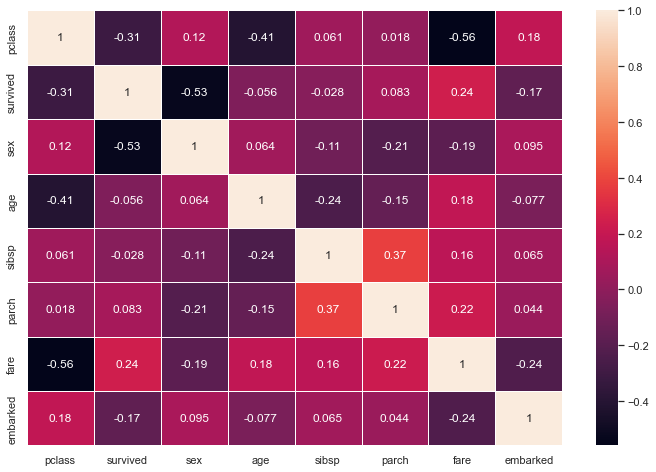

In [111]:
#heatmap
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(),annot=True, linewidths=0.8)

In [112]:
#removing nnecessary columns
data = data.drop(["name","cabin","ticket"],axis=1)

In [113]:
# check for null values
data.isnull().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      0
dtype: int64

In [114]:
## imputing missing values
from sklearn.impute import SimpleImputer

SI = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
data["age"] = SI.fit_transform(data["age"].to_numpy().reshape(-1,1))
data["fare"] = SI.fit_transform(data["fare"].to_numpy().reshape(-1,1))


In [115]:
data.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [116]:
#normalising values
cols = ["age","fare","parch"]
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
for i in cols:
    data[i] = mms.fit_transform(data[i].values.reshape(-1,1))

In [117]:
##outlier treatment 
outlier_cols =["age","sibsp","fare","parch"]
for i in outlier_cols:
    data[i]=data[i]**(1/3)

In [118]:
#split train test dataset
from sklearn.model_selection import train_test_split
X = data.drop(["survived"],axis=1).values
Y = data["survived"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=2)

In [119]:
#implementing model
from sklearn.naive_bayes import GaussianNB

GnB = GaussianNB()
GnB.fit(X_train,Y_train)

GaussianNB()

In [120]:
y_pred_test = GnB.predict(X_test)
y_pred_train = GnB.predict(X_train)

In [121]:
# finding accuracy 
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score,f1_score
print ("Accuracy of the model is: ")
print ("Test subset ==>",accuracy_score(Y_test,y_pred_test))
print ("Train subset ==>",accuracy_score(Y_train,y_pred_train))

Accuracy of the model is: 
Test subset ==> 0.7977099236641222
Train subset ==> 0.7452229299363057


In [122]:
#confusion matrix
print ("confusion_matrix")
print ("Testing\n",confusion_matrix(Y_test,y_pred_test))
print ("training\n",confusion_matrix(Y_train,y_pred_train))

confusion_matrix
Testing
 [[284  51]
 [ 55 134]]
training
 [[379  95]
 [105 206]]


In [123]:
#precision
print ("Precision")
print ("Testing\n",precision_score(Y_test,y_pred_test))
print ("training\n",precision_score(Y_train,y_pred_train))

Precision
Testing
 0.7243243243243244
training
 0.6843853820598007


In [124]:
#recall
print ("Recall")
print ("Testing\n",recall_score(Y_test,y_pred_test))
print ("training\n",recall_score(Y_train,y_pred_train))

Recall
Testing
 0.708994708994709
training
 0.662379421221865


In [125]:
print ("F1 score")
print ("Testing\n",f1_score(Y_test,y_pred_test))
print ("training\n",f1_score(Y_train,y_pred_train))

F1 score
Testing
 0.7165775401069518
training
 0.673202614379085


Real world application of naive bayes theorem ==>
1) To mark an email as spam, or not spam ?
2) Classify a news article about technology, politics, or sports ?
3) Check a piece of text expressing positive emotions, or negative emotions?
4) Also used for face recognition softwares